In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print (tf.__version__)

1.10.0


In [6]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [8]:
print (train_labels[:50])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 0 1 1 1 0 1 0]


In [10]:
#print (train_data[:50])

In [11]:
#print (train_data[0])

In [22]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3


    

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

88587


In [6]:
decode_review(train_data[20])

"<START> shown in australia as <UNK> this incredibly bad movie is so bad that you become <UNK> and have to watch it to the end just to see if it could get any worse and it does the storyline is so predictable it seems written by a high school <UNK> class the sets are pathetic but <UNK> better than the <UNK> and the acting is wooden br br the <UNK> <UNK> seems to have been stolen from the props <UNK> of <UNK> <UNK> there didn't seem to be a single original idea in the whole movie br br i found this movie to be so bad that i laughed most of the way through br br malcolm mcdowell should hang his head in shame he obviously needed the money"

In [1]:
#print(reverse_word_index)

In [23]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding='post', maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding='post', maxlen=256)

In [17]:
len(train_data), len(test_data)

(25000, 25000)

In [26]:
print (train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [27]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [15]:
len(train_data)
len(test_data)

25000

In [29]:
#Loss function and optimizer
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Need a validation set
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

#Train model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 55us/step - loss: 0.7000 - acc: 0.5037 - val_loss: 0.6949 - val_acc: 0.5092
Epoch 2/40
15000/15000 [==============================] - 0s 29us/step - loss: 0.6917 - acc: 0.5187 - val_loss: 0.6891 - val_acc: 0.5268
Epoch 3/40
15000/15000 [==============================] - 1s 36us/step - loss: 0.6857 - acc: 0.5613 - val_loss: 0.6837 - val_acc: 0.5902
Epoch 4/40
15000/15000 [==============================] - 1s 43us/step - loss: 0.6780 - acc: 0.6244 - val_loss: 0.6765 - val_acc: 0.5992
Epoch 5/40
15000/15000 [==============================] - 1s 34us/step - loss: 0.6685 - acc: 0.7094 - val_loss: 0.6655 - val_acc: 0.7420
Epoch 6/40
15000/15000 [==============================] - 0s 31us/step - loss: 0.6575 - acc: 0.7545 - val_loss: 0.6546 - val_acc: 0.7352
Epoch 7/40
15000/15000 [==============================] - 0s 29us/step - loss: 0.6437 - acc: 0.7694 - val_loss: 0.6410 - val_acc

In [24]:
results = model.evaluate(test_data, test_labels)

print(results)

NameError: name 'model' is not defined

In [23]:
print (acc)

NameError: name 'acc' is not defined

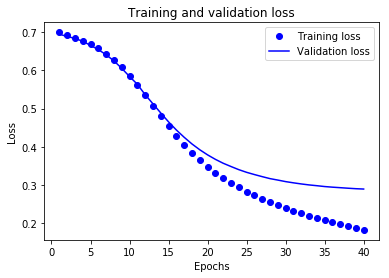

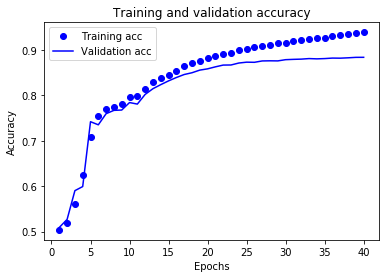

In [34]:
# Make use of matplot lib
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()